In [1]:
import numpy as np
import time
import re
import sys
import math
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [2]:
random_train_imgs = np.load("data/kmnist-randomized-train-imgs.npz")["arr_0"]
random_train_labels = np.load("data/kmnist-randomized-train-labels.npz")["arr_0"]
random_test_imgs = np.load("data/kmnist-randomized-test-imgs.npz")["arr_0"]
random_test_labels = np.load("data/kmnist-randomized-test-labels.npz")["arr_0"]

In [3]:
X_train = random_train_imgs.reshape(60000, 784)
X_train = X_train.astype("float32") / 255
X_test = random_test_imgs.reshape(10000, 784)
X_test = X_test.astype("float32") / 255
y_train = to_categorical(random_train_labels, 10)
y_test = to_categorical(random_test_labels, 10)

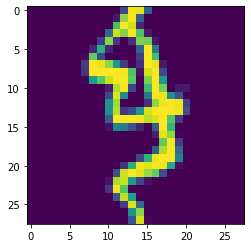

In [4]:
plt.imshow(X_train[10].reshape(28, 28))

In [31]:
import numpy as np
import time
import re
import sys
import math
import matplotlib.pyplot as plt

np.set_printoptions(threshold=sys.maxsize, suppress=True)
np.random.seed(1)

def kMeansClustering(K, sampleData):
    """Find K cluster centeriods of the passed sampleData
    """
    # Randomly select K examples as starting point for centeriods
    randIndices = np.random.choice(sampleData.shape[0], size=K, replace=False)
    centeriods = sampleData[randIndices, :]

    dataSize = 10000
    data = sampleData[:dataSize]
    for i in range(15):
        centeriodSums = np.zeros(shape=centeriods.shape)
        centeriodSumsCounter = np.zeros(shape=K)

        # 1. Allocate a training example to its nearest centriod
        for x in data:
             # Get index of closest centeriod to X (minimum of ||C - X||)
            index = np.argmin(np.square(centeriods - x).sum(axis=1))
            centeriodSums[index] += x
            centeriodSumsCounter[index] += 1
        
        # 2. Reassign the centriods to new means
        for i in range(K):
            centeriods[i] = centeriodSums[i] / centeriodSumsCounter[i]
    
    return centeriods

class Network:
    def __init__(self):
        self.XSize = 0
        self.HSize = 300
        self.OSize = 10
        self.X = []
        self.C = []
        self.Y = []
        self.W = []
        # self.B = np.random.uniform(-1, 1, (self.OSize))
        self.trainErrors = []
        self.testErrors = []

    def loadData(self, X, y, sampleSize):
        """Loads training/test data\n
        Parameters:\n
        - filenameX: filename for X features\n
        - filenameY: filename for Y (labels)\n
        - sampleSize: number of examples in dataset
        """
        self.X = X
        self.Y = y
        self.XSize = sampleSize

    def initializeCenters(self, K, useKMeans):
        """Initializes Centers (for RBF neurons in hidden layer)\n
        Parameters:\n
        - useKMeans: Set to true to use kMeans clustering to get centroids
        """
        print("Initialzing Centers...")
        self.HSize = K      # Since centriods is equal to hidden layer neurons
        if useKMeans:
            self.C = kMeansClustering(K, self.X)
        else:
            self.C = self.X[: self.HSize]

    def train(self, epochs=1, learnRate=0.1, K=300, save_weight="weights", useKMeans=False):
        """Trains the Network\n
        Parameters:\n
        - epochs: Number of epochs or trainings on entire dataset
        - learnRate: Learning Rate
        - K: Number of centers/centroids
        - useKMeans: Set to true to use kMeans clustering to get centroids
        """
        # Initialzing centers and weights
        self.initializeCenters(K, useKMeans)
        self.W = np.random.uniform(-1, 1, (self.HSize, self.OSize))

        self.trainErrors = np.zeros(shape=self.XSize)  # Preallocating numpy array
        print("Training...")
        for _ in tqdm(range(epochs)):
            # Take each data sample from the inputData
            for i, x in enumerate(self.X):
                HLayer = rbf(x, self.C)
                # Multiply the weights to get output for each data
                output = np.dot(HLayer, self.W)  # + self.B
                error = output - self.Y[i]
                self.W = self.W - (learnRate * np.outer(HLayer, error))
                # self.B = self.B - (learnRate * error)
                self.trainErrors[i] = 0.5 * sum(error ** 2)
        print("Training done")
        # Saving weights and centers in a file
        np.save(save_weight, self.W)
        np.save("centers", self.C)

    def predict(self):
        """Predicts using the Network by the set parameters (weight and
        centers) and displays the accuracy
        """
        self.testErrors = np.zeros(shape=self.XSize)  # Preallocating numpy array
        print("Prediciting...")
        totalAvg = count = correctCount = 0.0
        # Take each data sample from the inputData
        for count, x in enumerate(self.X):
            HLayer = rbf(x, self.C)
            output = np.dot(HLayer, self.W)  # + self.B
            o = np.argmax(output)
            y = np.argmax(self.Y[count])
            if o == y:
                correctCount += 1

            error = output - self.Y[count]
            self.testErrors[count] = 0.5 * sum(error ** 2)

        totalAvg = (correctCount * 100.0) / (count + 1)
        print(f"Total Avg. Accuracy: {totalAvg} %")


def rbf(x, C, beta=0.05):
    """Radial Basis Function\n
    Parameters:\n
    x: a training example
    C: centers of used for the hidden layer
    """
    H = np.zeros(shape=(np.shape(C)[0]))
    for i, c in enumerate(C):  # For each neuron in H layer
        H[i] = math.exp((-1 * beta) * np.dot(x - c, x - c))
    return H


def plotLearningCurves(trainErrors, testErrors):
    """Plots the learning curves of both training cost and test cost
    """
    # Averaging over the first {avgSize} examples
    avgSize = 100
    if type(trainErrors) is np.ndarray:     # if trainError data is available
        Jtrain = trainErrors.reshape(-1, avgSize).mean(axis=1)
        plt.plot(Jtrain, label='Training Cost')
    Jtest = testErrors.reshape(-1, avgSize).mean(axis=1)
#     plt.plot(Jtest, label='Test Cost')
    plt.xlabel(f"Data examples in {avgSize}s")
    plt.ylabel("Loss")
    plt.show()

1. Train the RBF Network
2. Predict using the RBF Network
Choose your option: 1


  0%|          | 0/5 [00:00<?, ?it/s]

Importing data for training...
60000 training examples imported in 0.00 sec
Initialzing Centers...
Training...


100%|██████████| 5/5 [09:25<00:00, 113.01s/it]


Training done
Training took: 565.08 sec
1. Train the RBF Network
2. Predict using the RBF Network
Choose your option: 2
Enter file name containing weights (default: weights.npy): weights1.npy
Importing data for testing...
Prediciting...
Total Avg. Accuracy: 62.35 %


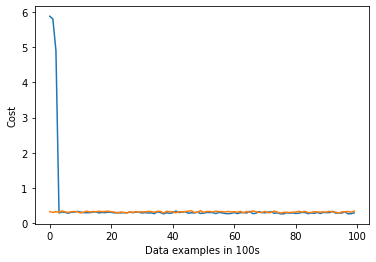

1. Train the RBF Network
2. Predict using the RBF Network
Choose your option: 3
Program exited.


In [7]:
if __name__ == "__main__":
    start = time.time()
    trainDataSize = 60000
    testDataSize = 10000
    
    myNetwork = Network()
    while True:
        print("1. Train the RBF Network\n2. Predict using the RBF Network")
        userInput = input("Choose your option: ")
        if userInput == "1":
            print("Importing data for training...")
            startTime = time.time()
            myNetwork.loadData(X_train, y_train, trainDataSize)
            print(
                f"{trainDataSize} training examples imported in {time.time()-startTime:.2f} sec"
            )
            
            startTrainingTime = time.time()
            myNetwork.train(epochs=5, learnRate=0.3, K=300, useKMeans=False, save_weight="weights1")
            print(f"Training took: {time.time()-startTrainingTime:.2f} sec")
        elif userInput == "2":
            # Loading centers and weights from save file
            filename = input("Enter file name containing weights (default: weights.npy): ")
            myNetwork.W = np.load(filename)
            myNetwork.C = np.load("centers.npy")

            print("Importing data for testing...")
            myNetwork.loadData(X_test, y_test, testDataSize)
            myNetwork.predict()
            # Plotting the errors of the first 10000 examples
            plotLearningCurves(myNetwork.trainErrors[:10000], myNetwork.testErrors[:10000])
        else:
            break
    print("Program exited.")

In [8]:
start = time.time()
trainDataSize = 60000
testDataSize = 10000
    
myNetwork = Network()

startTime = time.time()
myNetwork.loadData(X_train, y_train, trainDataSize)
print(
    f"{trainDataSize} training examples imported in {time.time()-startTime:.2f} sec"
)

startTrainingTime = time.time()
myNetwork.train(epochs=1, learnRate=0.3, K=300, useKMeans=False, save_weight="weights1")
print(f"Training took: {time.time()-startTrainingTime:.2f} sec")

  0%|          | 0/1 [00:00<?, ?it/s]

60000 training examples imported in 0.00 sec
Initialzing Centers...
Training...


100%|██████████| 1/1 [01:55<00:00, 115.22s/it]

Training done
Training took: 115.23 sec


Importing data for testing...
Prediciting...
Total Avg. Accuracy: 58.07 %


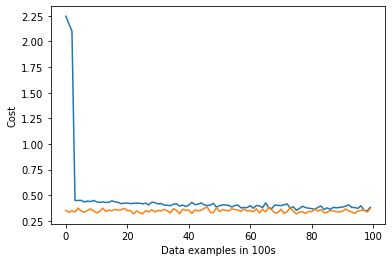

In [9]:
myNetwork.W = np.load("weights1.npy")
myNetwork.C = np.load("centers.npy")

print("Importing data for testing...")
myNetwork.loadData(X_test, y_test, testDataSize)
myNetwork.predict()
# Plotting the errors of the first 10000 examples
plotLearningCurves(myNetwork.trainErrors[:10000], myNetwork.testErrors[:10000])

In [10]:
start = time.time()
trainDataSize = 60000
testDataSize = 10000
    
myNetwork = Network()

startTime = time.time()
myNetwork.loadData(X_train, y_train, trainDataSize)
print(
    f"{trainDataSize} training examples imported in {time.time()-startTime:.2f} sec"
)

startTrainingTime = time.time()
myNetwork.train(epochs=10, learnRate=0.1, K=300, useKMeans=False, save_weight="weights1")
print(f"Training took: {time.time()-startTrainingTime:.2f} sec")

  0%|          | 0/10 [00:00<?, ?it/s]

60000 training examples imported in 0.00 sec
Initialzing Centers...
Training...


100%|██████████| 10/10 [17:51<00:00, 107.13s/it]

Training done
Training took: 1071.34 sec


Importing data for testing...
Prediciting...
Total Avg. Accuracy: 61.36 %


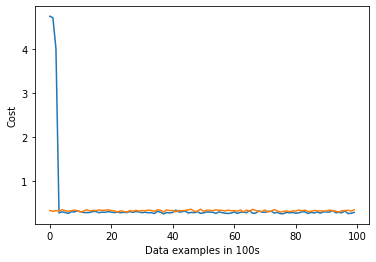

In [11]:
myNetwork.W = np.load("weights1.npy")
myNetwork.C = np.load("centers.npy")

print("Importing data for testing...")
myNetwork.loadData(X_test, y_test, testDataSize)
myNetwork.predict()
# Plotting the errors of the first 10000 examples
plotLearningCurves(myNetwork.trainErrors[:10000], myNetwork.testErrors[:10000])

In [12]:
start = time.time()
trainDataSize = 60000
testDataSize = 10000
    
myNetwork = Network()

startTime = time.time()
myNetwork.loadData(X_train, y_train, trainDataSize)
print(
    f"{trainDataSize} training examples imported in {time.time()-startTime:.2f} sec"
)

startTrainingTime = time.time()
myNetwork.train(epochs=10, learnRate=0.1, K=100, useKMeans=False, save_weight="weights2")
print(f"Training took: {time.time()-startTrainingTime:.2f} sec")

  0%|          | 0/10 [00:00<?, ?it/s]

60000 training examples imported in 0.00 sec
Initialzing Centers...
Training...


100%|██████████| 10/10 [06:03<00:00, 36.40s/it]

Training done
Training took: 363.97 sec


Importing data for testing...
Prediciting...
Total Avg. Accuracy: 52.89 %


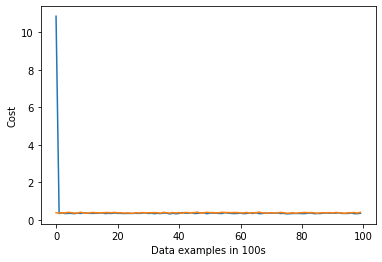

In [13]:
myNetwork.W = np.load("weights2.npy")
myNetwork.C = np.load("centers.npy")

print("Importing data for testing...")
myNetwork.loadData(X_test, y_test, testDataSize)
myNetwork.predict()
# Plotting the errors of the first 10000 examples
plotLearningCurves(myNetwork.trainErrors[:10000], myNetwork.testErrors[:10000])

In [14]:
start = time.time()
trainDataSize = 60000
testDataSize = 10000
    
myNetwork = Network()

startTime = time.time()
myNetwork.loadData(X_train, y_train, trainDataSize)
print(
    f"{trainDataSize} training examples imported in {time.time()-startTime:.2f} sec"
)

startTrainingTime = time.time()
myNetwork.train(epochs=10, learnRate=0.1, K=1000, useKMeans=False, save_weight="weights3")
print(f"Training took: {time.time()-startTrainingTime:.2f} sec")

  0%|          | 0/10 [00:00<?, ?it/s]

60000 training examples imported in 0.00 sec
Initialzing Centers...
Training...


100%|██████████| 10/10 [59:17<00:00, 355.76s/it]

Training done
Training took: 3557.61 sec


Importing data for testing...
Prediciting...
Total Avg. Accuracy: 70.39 %


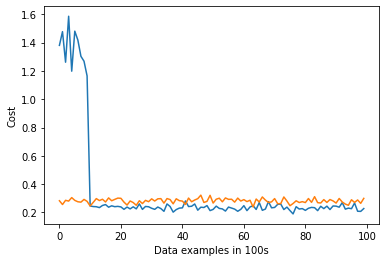

In [15]:
myNetwork.W = np.load("weights3.npy")
myNetwork.C = np.load("centers.npy")

print("Importing data for testing...")
myNetwork.loadData(X_test, y_test, testDataSize)
myNetwork.predict()
# Plotting the errors of the first 10000 examples
plotLearningCurves(myNetwork.trainErrors[:10000], myNetwork.testErrors[:10000])

In [16]:
start = time.time()
trainDataSize = 60000
testDataSize = 10000
    
myNetwork = Network()

startTime = time.time()
myNetwork.loadData(X_train, y_train, trainDataSize)
print(
    f"{trainDataSize} training examples imported in {time.time()-startTime:.2f} sec"
)

startTrainingTime = time.time()
myNetwork.train(epochs=20, learnRate=0.1, K=100, useKMeans=False, save_weight="weights4")
print(f"Training took: {time.time()-startTrainingTime:.2f} sec")

  0%|          | 0/20 [00:00<?, ?it/s]

60000 training examples imported in 0.00 sec
Initialzing Centers...
Training...


100%|██████████| 20/20 [12:08<00:00, 36.41s/it]

Training done
Training took: 728.15 sec


Importing data for testing...
Prediciting...
Total Avg. Accuracy: 53.96 %


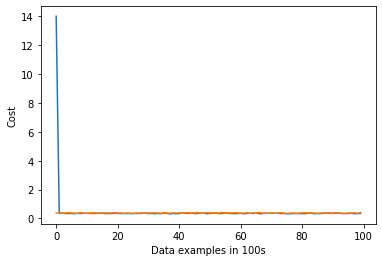

In [17]:
myNetwork.W = np.load("weights4.npy")
myNetwork.C = np.load("centers.npy")

print("Importing data for testing...")
myNetwork.loadData(X_test, y_test, testDataSize)
myNetwork.predict()
# Plotting the errors of the first 10000 examples
plotLearningCurves(myNetwork.trainErrors[:10000], myNetwork.testErrors[:10000])

In [18]:
start = time.time()
trainDataSize = 60000
testDataSize = 10000
    
myNetwork = Network()

startTime = time.time()
myNetwork.loadData(X_train, y_train, trainDataSize)
print(
    f"{trainDataSize} training examples imported in {time.time()-startTime:.2f} sec"
)

startTrainingTime = time.time()
myNetwork.train(epochs=20, learnRate=0.1, K=1000, useKMeans=False, save_weight="weights5")
print(f"Training took: {time.time()-startTrainingTime:.2f} sec")

  0%|          | 0/20 [00:00<?, ?it/s]

60000 training examples imported in 0.00 sec
Initialzing Centers...
Training...


100%|██████████| 20/20 [1:58:18<00:00, 354.92s/it]

Training done
Training took: 7098.42 sec


Importing data for testing...
Prediciting...
Total Avg. Accuracy: 71.87 %


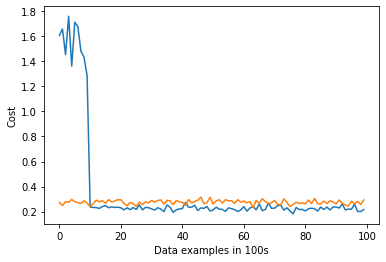

In [19]:
myNetwork.W = np.load("weights5.npy")
myNetwork.C = np.load("centers.npy")

print("Importing data for testing...")
myNetwork.loadData(X_test, y_test, testDataSize)
myNetwork.predict()
# Plotting the errors of the first 10000 examples
plotLearningCurves(myNetwork.trainErrors[:10000], myNetwork.testErrors[:10000])

In [22]:
start = time.time()
trainDataSize = 60000
testDataSize = 10000
    
myNetwork = Network()

startTime = time.time()
myNetwork.loadData(X_train, y_train, trainDataSize)
print(
    f"{trainDataSize} training examples imported in {time.time()-startTime:.2f} sec"
)

startTrainingTime = time.time()
myNetwork.train(epochs=1, learnRate=0.1, K=1000, useKMeans=True, save_weight="weights6")
print(f"Training took: {time.time()-startTrainingTime:.2f} sec")

60000 training examples imported in 0.00 sec
Initialzing Centers...


/Users/gijunglee/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
  0%|          | 0/1 [00:00<?, ?it/s]

Training...


100%|██████████| 1/1 [05:50<00:00, 350.65s/it]

Training done
Training took: 511.29 sec


Importing data for testing...
Prediciting...
Total Avg. Accuracy: 10.0 %


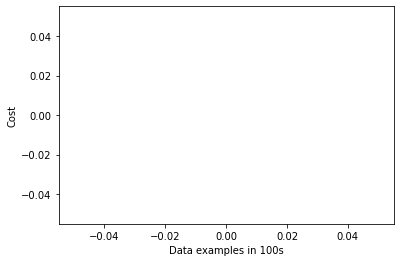

In [23]:
myNetwork.W = np.load("weights6.npy")
myNetwork.C = np.load("centers.npy")

print("Importing data for testing...")
myNetwork.loadData(X_test, y_test, testDataSize)
myNetwork.predict()
# Plotting the errors of the first 10000 examples
plotLearningCurves(myNetwork.trainErrors[:10000], myNetwork.testErrors[:10000])

In [25]:
start = time.time()
trainDataSize = 60000
testDataSize = 10000
    
myNetwork = Network()

startTime = time.time()
myNetwork.loadData(X_train, y_train, trainDataSize)
print(
    f"{trainDataSize} training examples imported in {time.time()-startTime:.2f} sec"
)

startTrainingTime = time.time()
myNetwork.train(epochs=1, learnRate=0.3, K=2000, useKMeans=False, save_weight="weights7")
print(f"Training took: {time.time()-startTrainingTime:.2f} sec")

  0%|          | 0/1 [00:00<?, ?it/s]

60000 training examples imported in 0.00 sec
Initialzing Centers...
Training...


100%|██████████| 1/1 [12:29<00:00, 749.43s/it]

Training done
Training took: 749.46 sec


Importing data for testing...
Prediciting...
Total Avg. Accuracy: 70.79 %


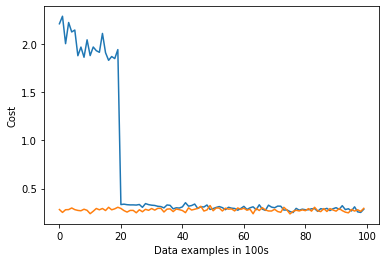

In [26]:
myNetwork.W = np.load("weights7.npy")
myNetwork.C = np.load("centers.npy")

print("Importing data for testing...")
myNetwork.loadData(X_test, y_test, testDataSize)
myNetwork.predict()
# Plotting the errors of the first 10000 examples
plotLearningCurves(myNetwork.trainErrors[:10000], myNetwork.testErrors[:10000])

In [27]:
start = time.time()
trainDataSize = 60000
testDataSize = 10000
    
myNetwork = Network()

startTime = time.time()
myNetwork.loadData(X_train, y_train, trainDataSize)
print(
    f"{trainDataSize} training examples imported in {time.time()-startTime:.2f} sec"
)

startTrainingTime = time.time()
myNetwork.train(epochs=1, learnRate=0.3, K=3000, useKMeans=False, save_weight="weights8")
print(f"Training took: {time.time()-startTrainingTime:.2f} sec")

  0%|          | 0/1 [00:00<?, ?it/s]

60000 training examples imported in 0.00 sec
Initialzing Centers...
Training...


100%|██████████| 1/1 [19:09<00:00, 1149.04s/it]

Training done
Training took: 1149.11 sec


Importing data for testing...
Prediciting...
Total Avg. Accuracy: 72.84 %


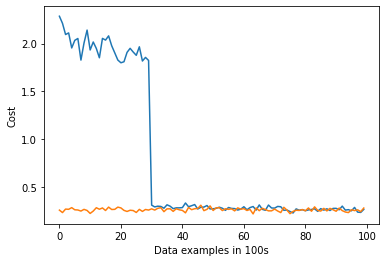

In [28]:
myNetwork.W = np.load("weights8.npy")
myNetwork.C = np.load("centers.npy")

print("Importing data for testing...")
myNetwork.loadData(X_test, y_test, testDataSize)
myNetwork.predict()
# Plotting the errors of the first 10000 examples
plotLearningCurves(myNetwork.trainErrors[:10000], myNetwork.testErrors[:10000])

Importing data for testing...
Prediciting...
Total Avg. Accuracy: 72.84 %


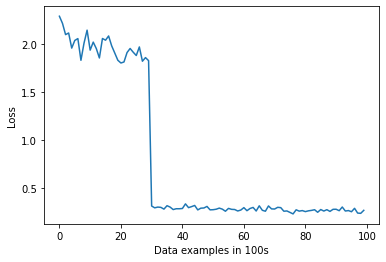

In [32]:
myNetwork.W = np.load("weights8.npy")
myNetwork.C = np.load("centers.npy")

print("Importing data for testing...")
myNetwork.loadData(X_test, y_test, testDataSize)
myNetwork.predict()
# Plotting the errors of the first 10000 examples
plotLearningCurves(myNetwork.trainErrors[:10000], myNetwork.testErrors[:10000])